# Lecture 21 - Advanced Visualizations

Wednesday 2021/04/14

---

## 🔨 Import packages and dataset

▶️ First, run the code cell below to import modules used for **🧭 Check Your Work** sections and the autograder.

In [1]:
import unittest
import base64
tc = unittest.TestCase()

▶️ Since you'll be creating latest types of [Plotly](https://plotly.com/python/), install/update [Plotly](https://plotly.com/python/) to the latest version by running the code below.

In [2]:
# Install plotly 4.14.3 using pip
# Colab environment supports pip
if 'google.colab' in str(get_ipython()):
    !pip install plotly==4.14.3

# If you're using conda, use the code below
# !conda install -c plotly plotly=4.14.3

▶️ Run the code cell below to import packages used in today's exercise.

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# plotly.io is a low-level interface for interacting with figures/
# plotly.io.templates lists available plotly templates
# https://plotly.com/python-api-reference/plotly.io.html
import plotly.io as pio

pd.set_option('display.max_columns', 50)

▶️ Run the code below to import Chicago Airbnb listings dataset.

In [4]:
df_listings = pd.read_csv('https://github.com/bdi475/datasets/raw/main/case-studies/airbnb-sql/Chicago.csv')
df_listings_backup = df_listings.copy()
df_listings.head(3)

name   neighbourhood  \
0  Hyde Park - Walk to UChicago, 10 min to McCormick       Hyde Park   
1  394 Great Reviews. 127 y/o House. 40 yds to tr...  South Lawndale   
2                Tiny Studio Apartment 94 Walk Score       West Town   

         room_type  bedrooms  bathrooms  accommodates  minimum_nights  price  \
0     Private room       1.0        1.0             1               2   65.0   
1  Entire home/apt       3.0        1.0             7               2  117.0   
2  Entire home/apt       3.0        1.0             2               2   70.0   

   availability_365  number_of_reviews  review_score  latitude  longitude  \
0               355                181         100.0  41.78790  -87.58780   
1               184                395          96.0  41.85495  -87.69696   
2               365                389          93.0  41.90289  -87.68182   

   is_superhost  
0             1  
1             1  
2             1

---

### 🎯 Exercise 1: Number of rows and columns

#### 👇 Tasks

- ✔️ Store the number of rows in `df_listings` to a new variable named `num_rows`.
- ✔️ Store the number of columns in `df_listings` to a new variable named `num_cols`.
- ✔️ Both `num_rows` and `num_cols` must be `int`s.
- ✔️ Use `.shape`, not `len()`.

In [5]:
# YOUR CODE BEGINS
num_rows = df_listings.shape[0]
num_cols = df_listings.shape[1]
# YOUR CODE ENDS

print(f'There are {num_rows} rows and {num_cols} columns in the dataset.')

There are 3217 rows and 14 columns in the dataset.


#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [6]:
# DO NOT CHANGE THE CODE IN THIS CELL
tc.assertEqual(num_rows, len(df_listings_backup.index), f'Number of rows should be {len(df_listings_backup.index)}')
tc.assertEqual(num_cols, len(df_listings_backup.columns), f'Number of columns should be {len(df_listings_backup.columns)}')

---

### 🎯 Exercise 2: Sample listings priced under \$200

#### 👇 Tasks

- ✔️ Sample 100 rows from `df_listings` where the `price` is under `200` (`df_listings['price'] < 200`).
- ✔️ Store the sampled result to a new DataFrame named `df_under_200_sample`.

#### 🚀 Hint

```python
my_sampled = my_dataframe[my_dataframe["price"] < 200].sample(100)
```

In [7]:
# YOUR CODE BEGINS
df_under_200_sample = df_listings[df_listings["price"] < 200].sample(100)
# YOUR CODE ENDS

display(df_under_200_sample.head(3))

name    neighbourhood  \
2121   Modern Relaxing Northside Apt. in Jefferson Park   Jefferson Park   
2036  Free Parking, Hyde Park,  McCormick, U of Chicago  Washington Park   
1842   A Roscoe Village Garden Apartment with a Garden!     North Center   

            room_type  bedrooms  bathrooms  accommodates  minimum_nights  \
2121  Entire home/apt       1.0        1.0             2               2   
2036  Entire home/apt       3.0        2.0            10               2   
1842  Entire home/apt       2.0        1.0             5               1   

      price  availability_365  number_of_reviews  review_score  latitude  \
2121  100.0               229                 71          99.0  41.98324   
2036  149.0               292                 70          93.0  41.79621   
1842   81.0               246                 75          98.0  41.94248   

      longitude  is_superhost  
2121  -87.77749             1  
2036  -87.61760             0  
1842  -87.67478             1

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [8]:
# DO NOT CHANGE THE CODE IN THIS CELL
tc.assertEqual(df_under_200_sample.shape, (100, df_listings_backup.shape[1]), 'Incorrect number of rows and/or columns')
tc.assertFalse((df_under_200_sample['price'] >= 200).any(), 'Listing priced equal to or greater than 200 found')

---

### 🎯 Exercise 3: Scatter Plot

#### 👇 Tasks

- ✔️ Using `df_under_200_sample`, create a scatter plot with the following axes:
    - `x`: Number of bedrooms
    - `y`: Number of bathrooms
- ✔️ Use price to differentiate size of each point.
- ✔️ Use room type to differentiate color of each point.
- ✔️ Set an appropriate title.
- ✔️ Use the `plotly_dark` theme.
- ✔️ Set the `width` to `800` and `height` to `400`.
- ✔️ Store your figure to a variable named `fig`.
- ✔️ Display the figure using `fig.show()`

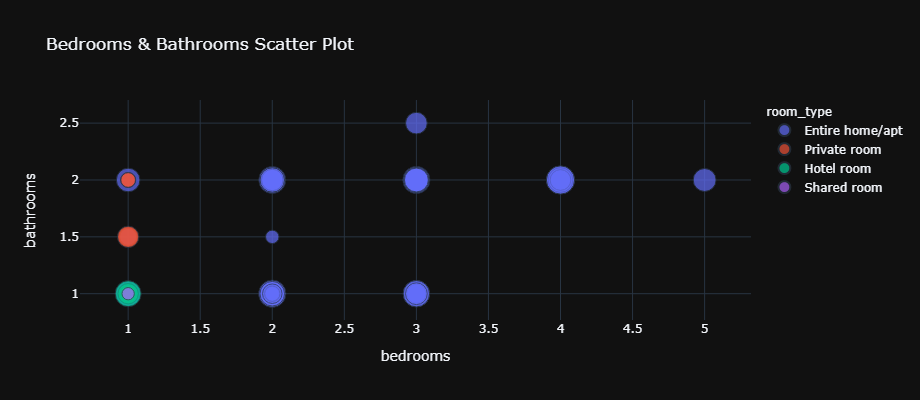

In [9]:
# YOUR CODE BEGINS
fig = px.scatter(
    df_under_200_sample,
    title='Bedrooms & Bathrooms Scatter Plot',
    x="bedrooms",
    y="bathrooms",
    size="price",
    color="room_type",
    template='plotly_dark',
    width=800,
    height=400
)
fig.show()
# YOUR CODE ENDS

#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [10]:
# DO NOT CHANGE THE CODE IN THIS CELL
tc.assertEqual(len(fig.data), df_under_200_sample['room_type'].nunique(), f'Did you specify a column to differentiate colors?')
tc.assertIsNotNone(fig.layout.title.text, 'Missing figure title')

num_points = 0
for i in range(len(fig.data)):
    tc.assertEqual(fig.data[i].type, 'scatter', 'Must be a scatter3d plot')
    num_points += fig.data[i].x.shape[0]

tc.assertEqual(num_points, 100, 'There must be 100 points')
tc.assertEqual(fig.layout.width, 800, 'Incorrect width')
tc.assertEqual(fig.layout.height, 400, 'Incorrect height')
tc.assertEqual(fig.layout.template, pio.templates['plotly_dark'], 'Incorrect plotly theme (template)')

---

### 🎯 Exercise 4: 3D Scatter Plots

This exercise is highly similar to the previous one. Instead of using size to differentiate price of each point, we'll use add a new axis. This makes it a 3D scatter plot! 🤡

#### 👇 Tasks

- ✔️ Using `df_under_200_sample`, create a 3D scatter plot with the following axes:
    - `x`: Number of bedrooms
    - `y`: Number of bathrooms
    - `z`: Price
- ✔️ Use room type to differentiate colors.
- ✔️ Set an appropriate title.
- ✔️ Use the `plotly_dark` theme.
- ✔️ Set the `width` and `height` to `800`.
- ✔️ Store your figure to a variable named `fig`.
- ✔️ Display the figure using `fig.show()`

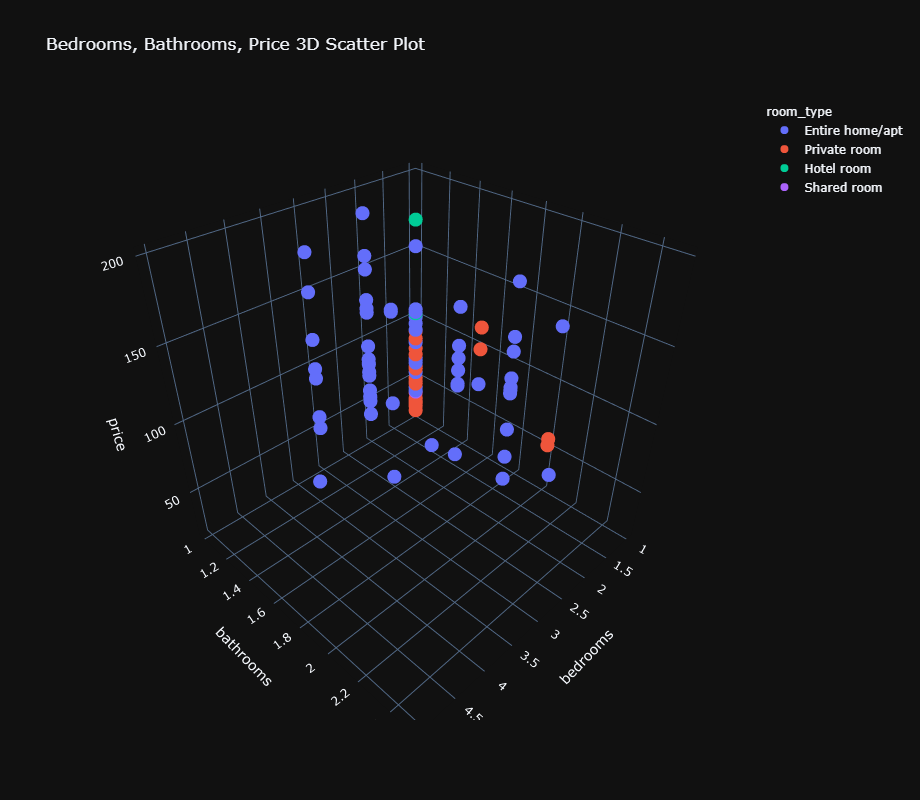

In [11]:
# YOUR CODE BEGINS
fig = px.scatter_3d(
    df_under_200_sample,
    title='Bedrooms, Bathrooms, Price 3D Scatter Plot',
    x="bedrooms",
    y="bathrooms",
    z="price",
    color="room_type",
    template='plotly_dark',
    width=800,
    height=800
)
fig.show()
# YOUR CODE ENDS

#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [12]:
# DO NOT CHANGE THE CODE IN THIS CELL
tc.assertEqual(len(fig.data), df_under_200_sample['room_type'].nunique(), f'Did you specify a column to differentiate colors?')
tc.assertIsNotNone(fig.layout.title.text, 'Missing figure title')

num_points = 0
for i in range(len(fig.data)):
    tc.assertEqual(fig.data[i].type, 'scatter3d', 'Must be a scatter3d plot')
    num_points += fig.data[i].x.shape[0]

tc.assertEqual(num_points, 100, 'There must be 100 points')
tc.assertEqual(fig.layout.width, 800, 'Incorrect width')
tc.assertEqual(fig.layout.height, 800, 'Incorrect height')
tc.assertEqual(fig.layout.template, pio.templates['plotly_dark'], 'Incorrect plotly theme (template)')

---

### 🎯 Exercise 5: Find a list of top 20 neighbourhoods

#### 👇 Tasks

- ✔️ Find the top 20 neighbourhoods in `df_listings` (by number of listings).
- ✔️ Store the result to a new variable named `top_20_neighbourhoods`.
- ✔️ `top_20_neighbourhoods` should be a Python `list` type.
- ✔️ We'll give you the fully-working code below.

#### 🔥 Solution

![Code](https://github.com/bdi475/images/blob/main/lecture-notes/dataviz-python/code-find-top-20-neighbourhoods-01.png?raw=true)

In [13]:
# YOUR CODE BEGINS
top_20_neighbourhoods = df_listings['neighbourhood'].value_counts().head(20).index.tolist()
# YOUR CODE ENDS

top_20_neighbourhoods

['West Town',
 'Lake View',
 'Logan Square',
 'Near North Side',
 'Lincoln Park',
 'Near West Side',
 'Lower West Side',
 'Uptown',
 'Edgewater',
 'North Center',
 'Irving Park',
 'Loop',
 'Avondale',
 'Rogers Park',
 'Near South Side',
 'Bridgeport',
 'Lincoln Square',
 'Grand Boulevard',
 'Hyde Park',
 'Armour Square']

#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [14]:
# DO NOT CHANGE THE CODE IN THIS CELL
decoded_code = base64.b64decode(b'dG9wXzIwX25laWdoYm91cmhvb2RzX2NoZWNrID0gZGZfbGlzd\
GluZ3NbJ25laWdoYm91cmhvb2QnXS52YWx1ZV9jb3VudHMoKS5oZWFkKDIwKS5pbmRleC50b2xpc3QoKQ==')

eval(compile(decoded_code, '<string>', 'exec'))

tc.assertEqual(set(top_20_neighbourhoods), set(top_20_neighbourhoods_check), 'Incorrect neighbourhoods')

---

### 🎯 Exercise 6: Filter listings in top 20 neighbourhoods

#### 👇 Tasks

- ✔️ Using `df_listings`, filter only the rows where the `neighbourhood` is in `top_20_neighbourhoods` **and** the price is less than 300.
- ✔️ Store the filtered result to a new variable named `df_filtered`.
- ✔️ We'll give you the fully-working code below.

#### 🔥 Solution

![Code](https://github.com/bdi475/images/blob/50cb80a994a1dd24ec2a0b51c8cf7fbcbf7197b9/lecture-notes/dataviz-python/code-filter-listings-in-top-20-neighbourhoods-01.png?raw=true)

In [15]:
# YOUR CODE BEGINS
df_filtered = df_listings[(df_listings['neighbourhood'].isin(top_20_neighbourhoods)) \
                          & (df_listings['price'] < 300)]
# YOUR CODE ENDS

display(df_filtered.head(3))
print(df_filtered.shape)

name neighbourhood  \
0  Hyde Park - Walk to UChicago, 10 min to McCormick     Hyde Park   
2                Tiny Studio Apartment 94 Walk Score     West Town   
3                      Barbara's Hideaway - Old Town  Lincoln Park   

         room_type  bedrooms  bathrooms  accommodates  minimum_nights  price  \
0     Private room       1.0        1.0             1               2   65.0   
2  Entire home/apt       3.0        1.0             2               2   70.0   
3  Entire home/apt       1.0        1.0             4               4   95.0   

   availability_365  number_of_reviews  review_score  latitude  longitude  \
0               355                181         100.0  41.78790  -87.58780   
2               365                389          93.0  41.90289  -87.68182   
3               282                 54          93.0  41.91769  -87.63788   

   is_superhost  
0             1  
2             1  
3             1

(2391, 14)


#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [16]:
# DO NOT CHANGE THE CODE IN THIS CELL
decoded_code = base64.b64decode(b'dG9wXzIwX25laWdoYm91cmhvb2RzX2NoZWNrID0g\
ZGZfbGlzdGluZ3NfYmFja3VwWyduZWlnaGJvdXJob29kJ10udmFsdWVfY291bnRzKCkuaGVhZC\
gyMCkuaW5kZXgudG9saXN0KCkKCmRmX2ZpbHRlcmVkX2NoZWNrID0gZGZfbGlzdGluZ3NfYmFj\
a3VwWyhkZl9saXN0aW5nc19iYWNrdXBbJ25laWdoYm91cmhvb2QnXS5pc2luKHRvcF8yMF9uZW\
lnaGJvdXJob29kc19jaGVjaykpICYgKGRmX2xpc3RpbmdzX2JhY2t1cFsncHJpY2UnXSA8IDMwMCld')

eval(compile(decoded_code, '<string>', 'exec'))

tc.assertEqual(df_filtered.shape, df_filtered_check.shape, 'Incorrect number of rows and/or columns')
pd.testing.assert_frame_equal(
    df_filtered.sort_values(df_filtered.columns.tolist()).reset_index(drop=True),
    df_filtered_check.sort_values(df_filtered_check.columns.tolist()).reset_index(drop=True)
)

---

### 🎯 Exercise 7: Neighbourhood breakdown

#### 👇 Tasks

- ✔️ Using `df_filtered`, create a pie chart that shows the breakdown of neighbourhoods.
- ✔️ Set an appropriate title.
- ✔️ Set the `width` to `800` and `height` to `700`.
- ✔️ Store your figure to a variable named `fig`.
- ✔️ Display the figure using `fig.show()`

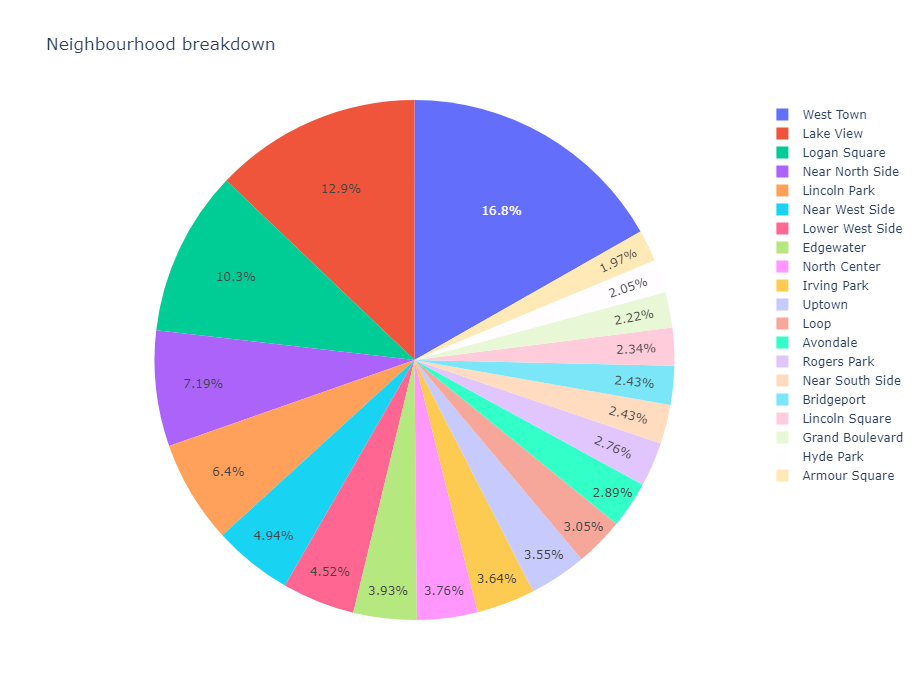

In [17]:
# YOUR CODE BEGINS
fig = px.pie(
    df_filtered,
    names='neighbourhood',
    title='Neighbourhood breakdown',
    width=800,
    height=700
)

fig.show()
# YOUR CODE ENDS

#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [18]:
# DO NOT CHANGE THE CODE IN THIS CELL
tc.assertIsNotNone(fig.layout.title.text, 'Missing figure title')
tc.assertEqual(fig.data[0].type, 'pie', 'Must be a pie chart')
tc.assertEqual(set(fig.data[0].labels), set(top_20_neighbourhoods), 'Must only use the top 20 neighbourhoods')

tc.assertEqual(fig.layout.width, 800, 'Incorrect width')
tc.assertEqual(fig.layout.height, 700, 'Incorrect height')

---

### 🎯 Exercise 8: Neighbourhood vs price heatmap

#### 👇 Tasks

- ✔️ Using `df_filtered`, create a heatmap to visualize the distribution of listings price by neighbourhood.
- ✔️ Use `neighbourhood` on the x-axis and `price` on the y-axis.
- ✔️ Set an appropriate title.
- ✔️ Set the `height` to `600` (do not specify `width`).
- ✔️ Store your figure to a variable named `fig`.
- ✔️ Display the figure using `fig.show()`

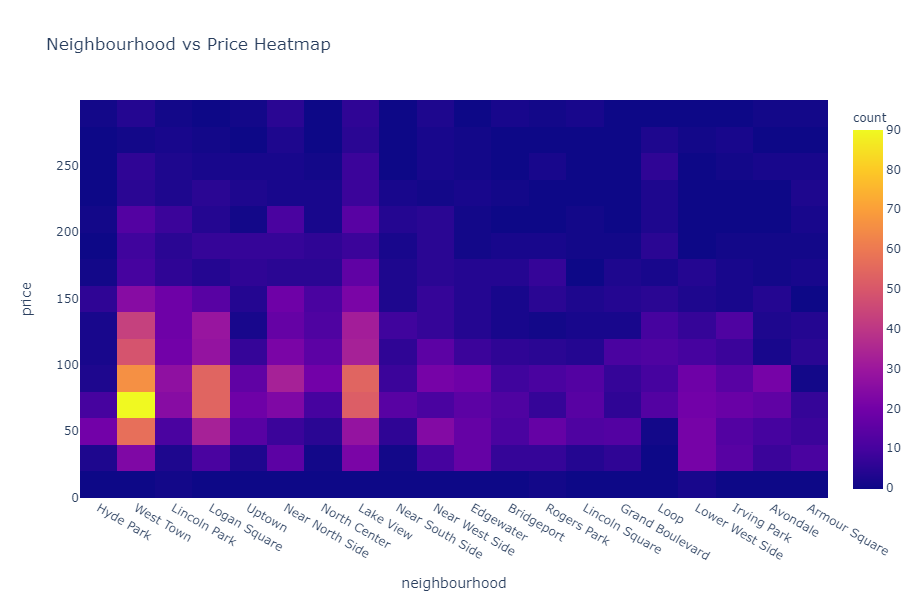

In [19]:
# YOUR CODE BEGINS
fig = px.density_heatmap(
    df_filtered,
    x='neighbourhood',
    y='price',
    title='Neighbourhood vs Price Heatmap',
    height=600
)
fig.show()
# YOUR CODE ENDS

In [20]:
# DO NOT CHANGE THE CODE IN THIS CELL
decoded_code = base64.b64decode(b'ZmlnX2NoZWNrID0gcHguZGVuc2l0eV9oZWF0bWFwKAogICAgZGZfZ\
mlsdGVyZWQsCiAgICB4PSduZWlnaGJvdXJob29kJywKICAgIHk9J3ByaWNlJywKICAgIGhlaWdodD02MDAKKQ==')

eval(compile(decoded_code, '<string>', 'exec'))

tc.assertIsNotNone(fig.layout.title.text, 'Missing figure title')
tc.assertEqual(fig.data[0].type, 'histogram2d', 'Must be a heatmap (histogram2d)')
tc.assertEqual(set(fig.data[0].x), set(fig_check.data[0].x), 'Incorrect x-axis value(s)')
tc.assertEqual(set(fig.data[0].y), set(fig_check.data[0].y), 'Incorrect y-axis value(s)')
tc.assertEqual(fig.layout.height, fig_check.layout.height, 'Incorrect height')

---

### 🎯 Exercise 9: Listing metrics by neighbourhood and room type

#### 👇 Tasks

- ✔️ Using `df_filtered`, calculate the following aggregated values by `neighbourhood` and `room_type`.
    - `num_listings`: Number of listings
    - `bedrooms`: Average number of bedrooms
    - `bathrooms`: Average number of bathrooms
    - `price`: Average price
- ✔️ Store the resulting DataFrame to a new variable named `df_by_neighbourhood_room_type`.
- ✔️ We'll give you the fully-working code below.

#### 🔥 Solution

```python
df_by_neighbourhood_room_type = df_filtered.groupby(['neighbourhood', 'room_type'], as_index=False) \
    .agg({
        'name': 'count',
        'bedrooms': 'mean',
        'bathrooms': 'mean',
        'accommodates': 'mean',
        'price': 'mean'
    }).rename(columns={
        'name': 'num_listings'
    })
```

In [21]:
# YOUR CODE BEGINS
df_by_neighbourhood_room_type = df_filtered.groupby(['neighbourhood', 'room_type'], as_index=False) \
    .agg({
        'name': 'count',
        'bedrooms': 'mean',
        'bathrooms': 'mean',
        'accommodates': 'mean',
        'price': 'mean'
    }).rename(columns={
        'name': 'num_listings'
    })
# YOUR CODE ENDS

display(df_by_neighbourhood_room_type.head(5))

neighbourhood        room_type  num_listings  bedrooms  bathrooms  \
0  Armour Square  Entire home/apt            22  3.090909   1.545455   
1  Armour Square     Private room            25  1.000000   1.760000   
2       Avondale  Entire home/apt            59  1.932203   1.152542   
3       Avondale     Private room             9  1.111111   1.055556   
4       Avondale      Shared room             1  1.000000   1.000000   

   accommodates       price  
0      9.000000  167.454545  
1      1.920000   44.480000  
2      4.932203   92.084746  
3      1.666667   70.888889  
4      1.000000   30.000000

#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [22]:
# DO NOT CHANGE THE CODE IN THIS CELL
decoded_code = base64.b64decode(b'dG9wXzIwX25laWdoYm91cmhvb2RzX2NoZWNrID0gZGZfbGlzdGluZ3Nf\
YmFja3VwWyduZWlnaGJvdXJob29kJ10udmFsdWVfY291bnRzKCkuaGVhZCgyMCkuaW5kZXgudG9saXN0KCkKCmRmX2\
ZpbHRlcmVkX2NoZWNrID0gZGZfbGlzdGluZ3NfYmFja3VwWyhkZl9saXN0aW5nc19iYWNrdXBbJ25laWdoYm91cmhv\
b2QnXS5pc2luKHRvcF8yMF9uZWlnaGJvdXJob29kc19jaGVjaykpICYgKGRmX2xpc3RpbmdzX2JhY2t1cFsncHJpY2\
UnXSA8IDMwMCldCgpkZl9ieV9uZWlnaGJvdXJob29kX3Jvb21fdHlwZV9jaGVjayA9IGRmX2ZpbHRlcmVkLmdyb3Vw\
YnkoWyduZWlnaGJvdXJob29kJywgJ3Jvb21fdHlwZSddLCBhc19pbmRleD1GYWxzZSkgXAogICAgLmFnZyh7CiAgIC\
AgICAgJ25hbWUnOiAnY291bnQnLAogICAgICAgICdiZWRyb29tcyc6ICdtZWFuJywKICAgICAgICAnYmF0aHJvb21z\
JzogJ21lYW4nLAogICAgICAgICdhY2NvbW1vZGF0ZXMnOiAnbWVhbicsCiAgICAgICAgJ3ByaWNlJzogJ21lYW4nCi\
AgICB9KS5yZW5hbWUoY29sdW1ucz17CiAgICAgICAgJ25hbWUnOiAnbnVtX2xpc3RpbmdzJwogICAgfSk=')

eval(compile(decoded_code, '<string>', 'exec'))

tc.assertEqual(
    df_by_neighbourhood_room_type.shape,
    df_by_neighbourhood_room_type_check.shape,
    'Incorrect number of rows and/or columns'
)
pd.testing.assert_frame_equal(
    df_by_neighbourhood_room_type.sort_values(df_by_neighbourhood_room_type.columns.tolist()).reset_index(drop=True),
    df_by_neighbourhood_room_type_check.sort_values(df_by_neighbourhood_room_type_check.columns.tolist()).reset_index(drop=True)
)

---

## ✨ Other visualizations

▶️ Run the code below to create a bar chart describing the number of listings by neighbourhood (broken down into room types).

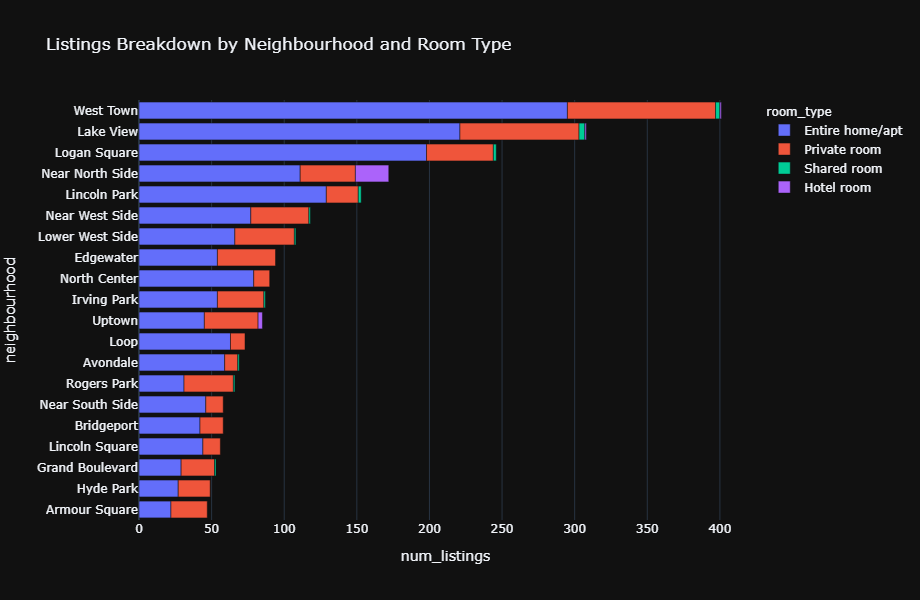

In [23]:
fig = px.bar(
    df_by_neighbourhood_room_type,
    x='num_listings',
    y='neighbourhood',
    color='room_type',
    template='plotly_dark',
    title='Listings Breakdown by Neighbourhood and Room Type',
    height=600
)

fig.update_yaxes(categoryorder='total ascending')

fig.show()

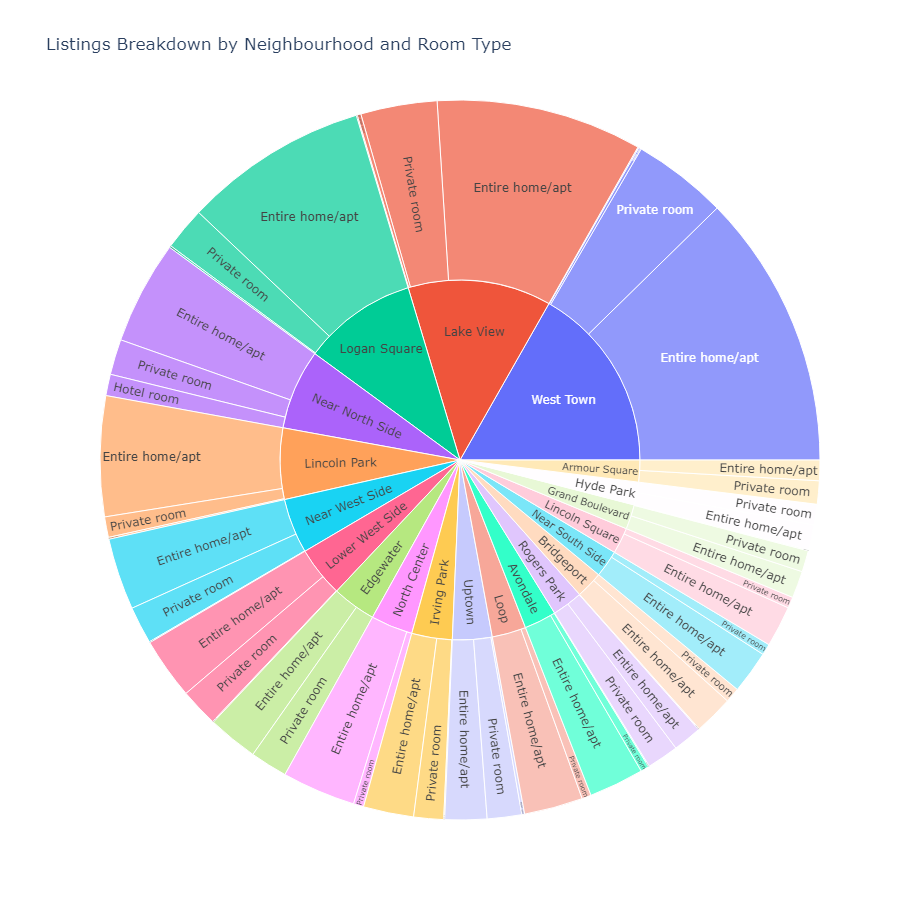

In [24]:
fig = px.sunburst(
    df_by_neighbourhood_room_type,
    path=['neighbourhood', 'room_type'],
    title='Listings Breakdown by Neighbourhood and Room Type',
    values='num_listings',
    width=800,
    height=900
)

fig.show()

▶️ Run the code below to create a treemap chart describing the distribution of listings by neighbourhood.

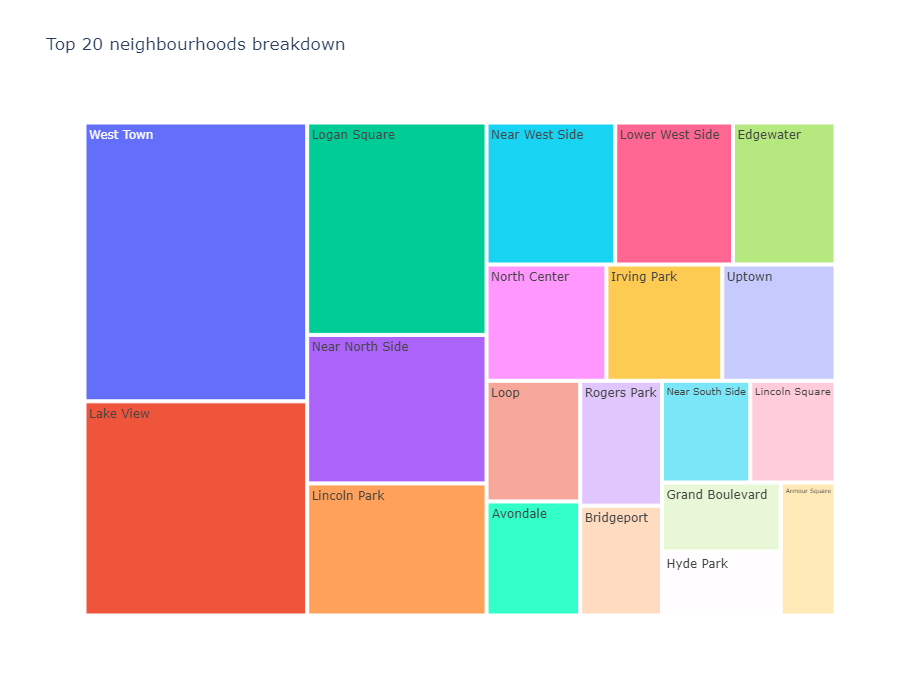

In [25]:
fig = px.treemap(
    df_by_neighbourhood_room_type,
    path=['neighbourhood'],
    title='Top 20 neighbourhoods breakdown',
    values='num_listings',
    height=700
)

fig.show()

▶️ Run the code below to create a treemap chart describing the distribution of listings by neighbourhood (broken down into room types).

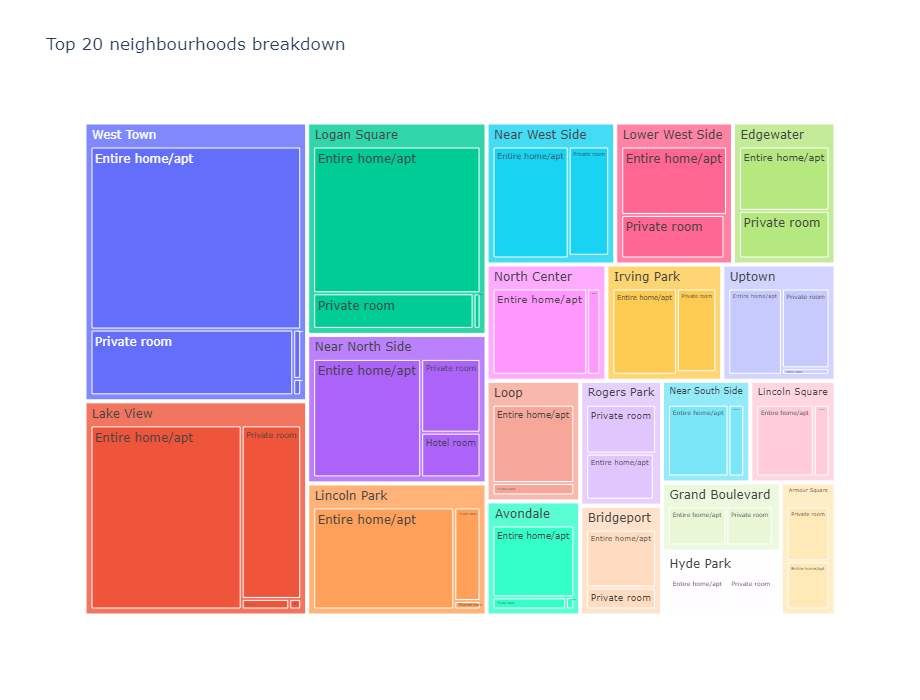

In [26]:
fig = px.treemap(
    df_by_neighbourhood_room_type,
    path=['neighbourhood', 'room_type'],
    title='Top 20 neighbourhoods breakdown',
    values='num_listings',
    height=700
)

fig.show()